<a href="https://colab.research.google.com/github/cown0211/Python/blob/main/%EC%86%8C%EB%93%9D%EC%98%88%EC%B8%A1%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 드라이브로 공유된 원본 데이터 다운
!pip install gdown
!gdown --id 17afFPI24tT8MlDZ3vJyM2QfmudgY-5VG --output income_data.zip

# 경로 옮기기
!mkdir /content/drive/MyDrive/Dacon/Income/data
!mv /content/income_data.zip /content/drive/MyDrive/Dacon/Income/data

# 압축 해제
!unzip -uq "/content/drive/MyDrive/Dacon/Income/data/income_data.zip" -d "/content/drive/My Drive/Dacon/Income/data"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17afFPI24tT8MlDZ3vJyM2QfmudgY-5VG
To: /content/income_data.zip
100% 540k/540k [00:00<00:00, 61.2MB/s]


In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 읽기

path = "/content/drive/My Drive/Dacon/Income/data/income_data/"

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
sub = pd.read_csv(path + "sample_submission.csv")

In [ ]:
# DataFrame 형태 확인

train.shape

(17480, 16)

In [ ]:
# DataFrame 예시

train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
# 결측치 및 데이터 타입 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [ ]:
# 칼럼명에서 .을 _로 변경

train.columns = train.columns.str.replace('.','_')
test.columns = test.columns.str.replace('.','_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
# 결측치가 있는 열과 개수 확인

for i in range(0, len(train.columns)):
  cnt = len(train[train.iloc[:, i].isna() == True])
  if cnt != 0:
    print(train.columns[i] + " 열에 결측값이 " + str(cnt) + "개 있습니다.")

workclass 열에 결측값이 1836개 있습니다.
occupation 열에 결측값이 1843개 있습니다.
native_country 열에 결측값이 583개 있습니다.


In [ ]:
# workclass, occupation 변수에는 Na 값을 None으로 대체
# native_country 변수의 Na 값은 삭제

train_new = train

train_new["workclass"].fillna("None", inplace = True)
train_new["occupation"].fillna("None", inplace = True)
train_new = train_new.loc[-train_new["native_country"].isna() == True]

# 제거 후의 행 길이
len(train_new)

16897

In [ ]:
# target의 비율

train_new["target"].value_counts()

0    12937
1     3960
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


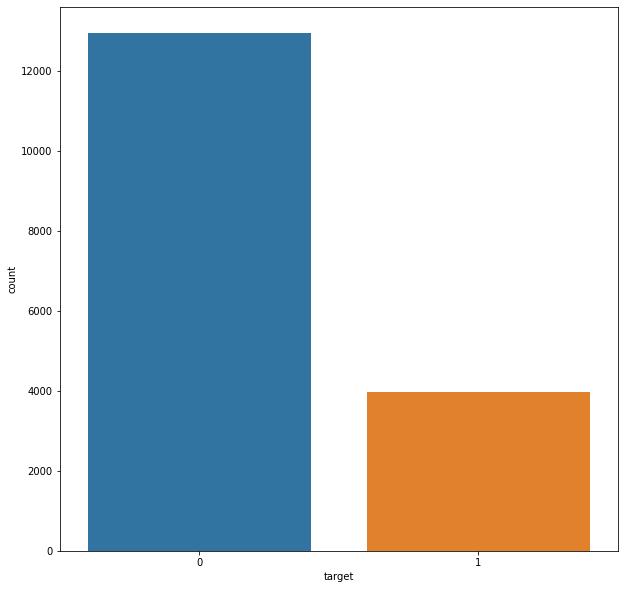

In [ ]:
sns.countplot(train_new["target"])
plt.show()

# 약 3:1의 비율로 클래스 불균형이 발견됨

In [ ]:
# workclass 변수 탐색

train_new["workclass"].value_counts()

Private             11158
None                 1809
Self-emp-not-inc     1230
Local-gov            1027
State-gov             640
Self-emp-inc          552
Federal-gov           468
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


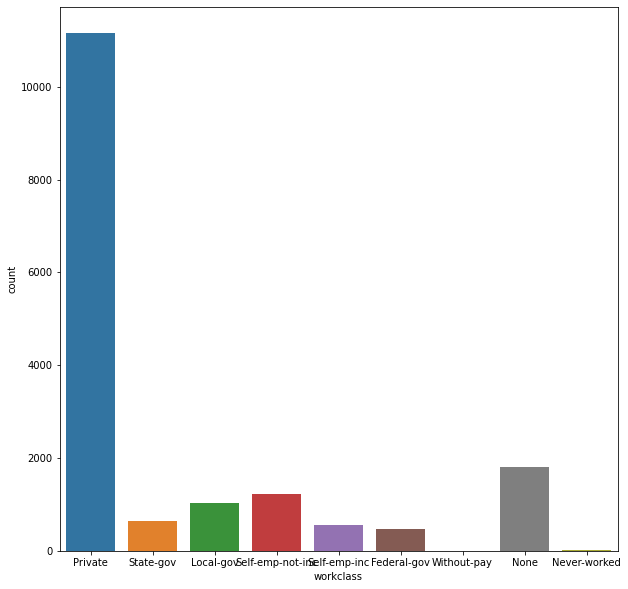

In [ ]:
sns.countplot(train_new["workclass"])
plt.show()

# private의 비율이 압도적으로 높음

In [ ]:
# 2차원 분할표
pd.crosstab(train_new.target, train_new.workclass, margins=True)

# self-enmp-inc을 제외한 모든 값에서 target = 0 우세

workclass,Federal-gov,Local-gov,Never-worked,None,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
target,,,,,,,,,,
0,291,718,7,1622,8713,251,867,462,6,12937
1,177,309,0,187,2445,301,363,178,0,3960
All,468,1027,7,1809,11158,552,1230,640,6,16897


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


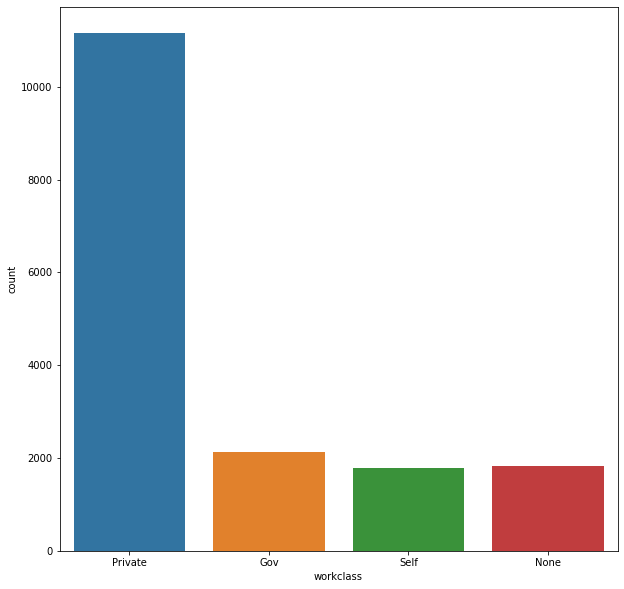

workclass,Gov,None,Private,Self,All
target,,,,,
0,1471,1635,8713,1118,12937
1,664,187,2445,664,3960
All,2135,1822,11158,1782,16897


In [ ]:
# 재범주화

train_new["workclass"].replace(["State-gov", "Local-gov", "Federal-gov"], "Gov", inplace = True)

train_new["workclass"].replace(["Self-emp-not-inc", "Self-emp-inc"], "Self", inplace = True)

train_new["workclass"].replace(["Never-worked", "Without-pay"], "None", inplace = True)


# countplot
sns.countplot(train_new["workclass"])
plt.show()

# 2차원 분할표
pd.crosstab(train_new.target, train_new.workclass, margins=True)

In [ ]:
# age 변수 탐색

age = train_new["age"]

print(" age 최소값: ", min(train_new["age"]), "\n", "age 최대값: ", max(train_new["age"]), "\n", "age 평균값: ", np.mean(train_new["age"]), "\n", "age 중위값: ", np.median(train_new["age"]))

 age 최소값:  17 
 age 최대값:  90 
 age 평균값:  38.72083801858318 
 age 중위값:  37.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


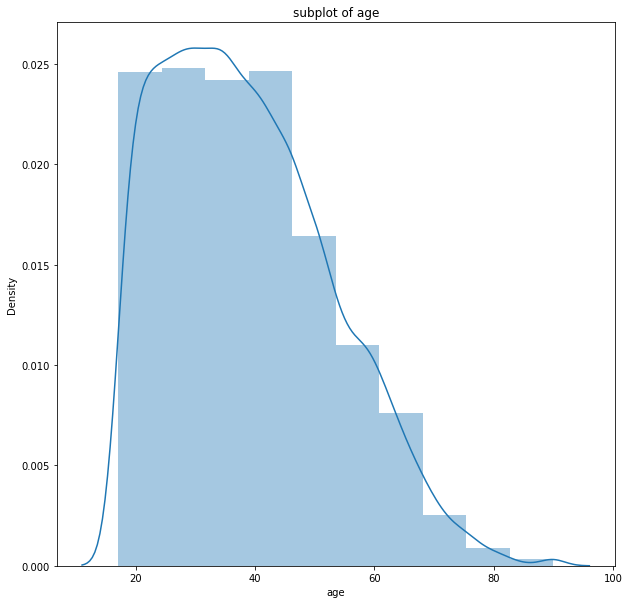

In [ ]:
# age 변수 밀집도, 히스토그램

p = plt.subplots()
p = sns.distplot(train_new["age"], kde = True, hist = True, bins = 10)
p.set_title("subplot of age")
p.set_xlabel("age")
plt.show()

In [ ]:
# age 변수 log 변환

train_new["age_log"] = np.log1p(train_new["age"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


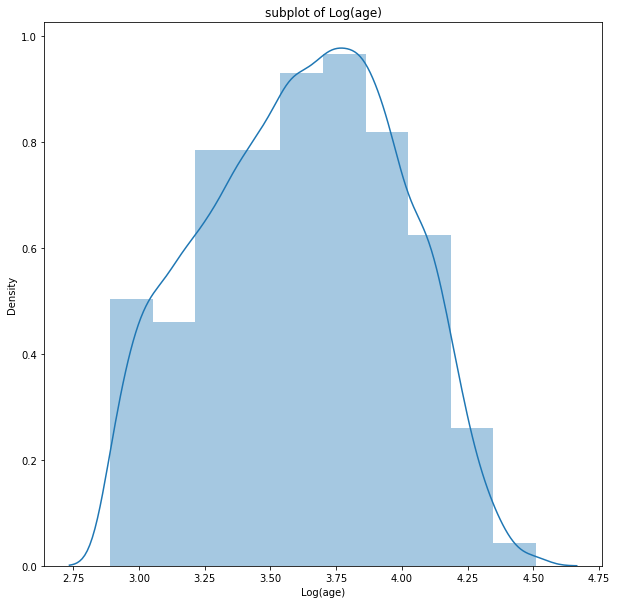

In [ ]:
# age_log 시각화

p = plt.subplots()
p = sns.distplot(train_new["age_log"], kde = True, hist = True, bins = 10)
p.set_title("subplot of Log(age)")
p.set_xlabel("Log(age)")
plt.show()

In [ ]:
train_new.drop("age", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# education 변수 탐색

train_new["education"].value_counts()

HS-grad         5433
Some-college    3801
Bachelors       2697
Masters          872
Assoc-voc        708
11th             656
Assoc-acdm       576
10th             498
7th-8th          359
9th              286
Prof-school      284
12th             233
Doctorate        191
5th-6th          182
1st-4th           91
Preschool         30
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


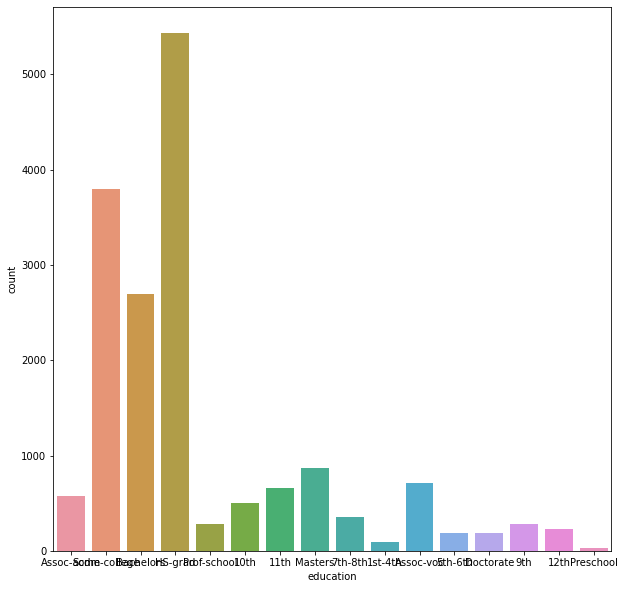

In [ ]:
sns.countplot(train_new["education"])
plt.show()

# HS-grad, Some-college, Bachelors 항목이 가장 많음

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


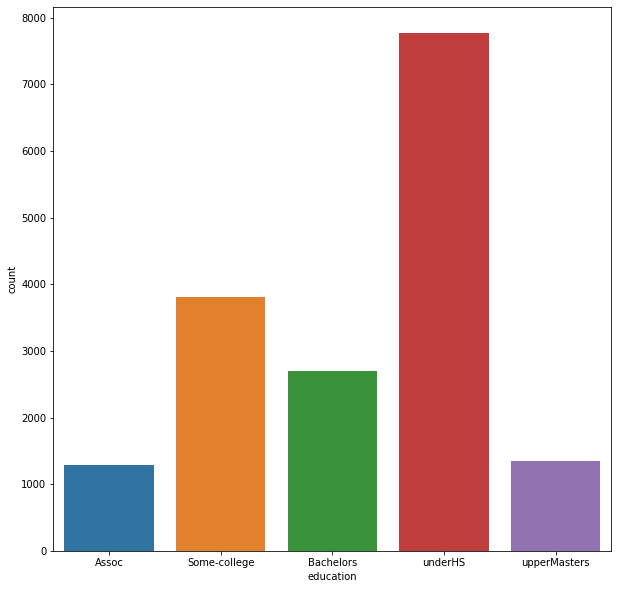

education,Assoc,Bachelors,Some-college,underHS,upperMasters,All
target,,,,,,
0,953,1572,3078,6824,510,12937
1,331,1125,723,944,837,3960
All,1284,2697,3801,7768,1347,16897


In [ ]:
# 재범주화

train_new["education"].replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], "underHS", inplace = True)

train_new["education"].replace(["Assoc-voc", "Assoc-acdm"], "Assoc", inplace = True)

train_new["education"].replace(["Prof-school", "Masters", "Doctorate"], "upperMasters", inplace = True)


# 시각화
sns.countplot(train_new["education"])
plt.show()

# 2차원 분할표
pd.crosstab(train_new.target, train_new.education, margins=True)

In [ ]:
# education.num 변수는 education 변수를 숫자로 변환한 것

train_new["education_num"].value_counts()

9     5433
10    3801
13    2697
14     872
11     708
7      656
12     576
6      498
4      359
5      286
15     284
8      233
16     191
3      182
2       91
1       30
Name: education_num, dtype: int64

In [ ]:
train_new.drop(["education_num"], axis = 1, inplace = True)
# 의미 없으므로 삭제

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train["marital_status"].value_counts()

Married-civ-spouse       7719
Never-married            5576
Divorced                 2266
Widowed                   576
Separated                 520
Married-spouse-absent     226
Married-AF-spouse          14
Name: marital_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


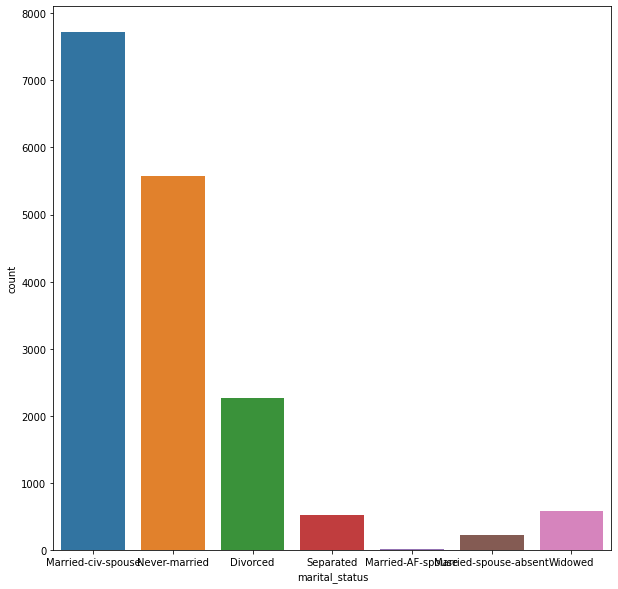

In [ ]:
sns.countplot(train_new["marital_status"])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


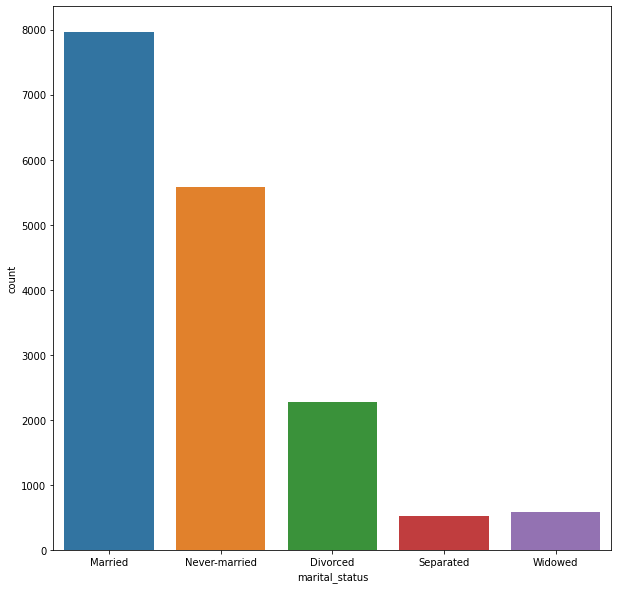

marital_status,Divorced,Married,Never-married,Separated,Widowed,All
target,,,,,,
0,2024,4563,5335,486,529,12937
1,242,3396,241,34,47,3960
All,2266,7959,5576,520,576,16897


In [ ]:
# 재범주화

train_new["marital_status"].replace(["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"], "Married", inplace = True)

# 시각화
sns.countplot(train_new["marital_status"])
plt.show()

# 2차원 분할표
pd.crosstab(train_new.target, train_new["marital_status"], margins=True)

In [ ]:
train_new["occupation"].value_counts()

Exec-managerial      2039
Craft-repair         2032
Prof-specialty       1983
Adm-clerical         1844
None                 1816
Sales                1763
Other-service        1594
Machine-op-inspct    1004
Transport-moving      760
Handlers-cleaners     675
Farming-fishing       503
Tech-support          459
Protective-serv       345
Priv-house-serv        77
Armed-Forces            3
Name: occupation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


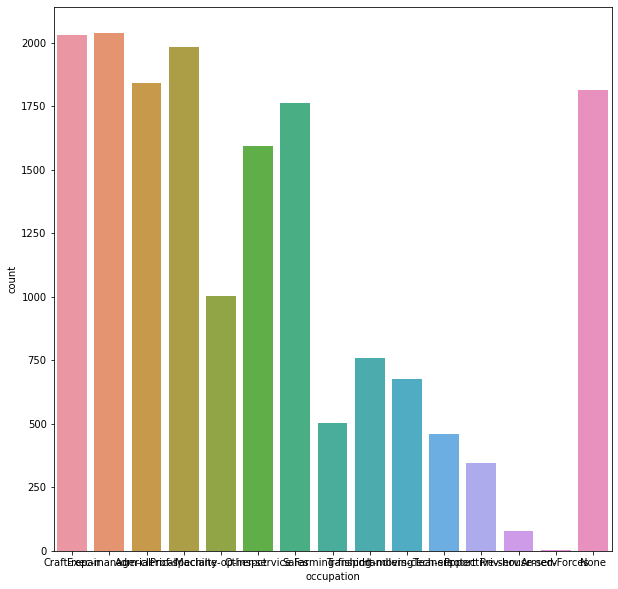

In [ ]:
sns.countplot(train_new["occupation"])
plt.show()

In [ ]:
train_new["relationship"].value_counts()

Husband           6726
Not-in-family     4266
Own-child         2771
Unmarried         1760
Wife               870
Other-relative     504
Name: relationship, dtype: int64

In [ ]:
# capital_gain 변수 탐색

cap_gain = train_new["capital_gain"]

print("capital_gain 변수의 \n 최소값: ", min(cap_gain), "\n 최대값: ", max(cap_gain), "\n 평균값: ", np.mean(cap_gain), "\n 중위값: ", np.median(cap_gain))

capital_gain 변수의 
 최소값:  0 
 최대값:  99999 
 평균값:  1051.4615612238858 
 중위값:  0.0


In [ ]:
# capital_loss 변수 탐색

cap_loss = train_new["capital_loss"]

print("capital_loss 변수의 \n 최소값: ", min(cap_loss), "\n 최대값: ", max(cap_loss), "\n 평균값: ", np.mean(cap_loss), "\n 중위값: ", np.median(cap_loss))

capital_loss 변수의 
 최소값:  0 
 최대값:  4356 
 평균값:  82.68799195123394 
 중위값:  0.0


In [ ]:
train_new["native_country"].value_counts()

United-States                 15393
Mexico                          355
Philippines                     108
Germany                          75
Canada                           63
Puerto-Rico                      59
El-Salvador                      58
Cuba                             49
India                            47
England                          46
Jamaica                          42
China                            40
South                            39
Italy                            38
Dominican-Republic               38
Columbia                         37
Guatemala                        36
Poland                           35
Japan                            33
Vietnam                          32
Taiwan                           28
Haiti                            23
Nicaragua                        20
Portugal                         20
Ecuador                          19
Ireland                          18
Iran                             17
Peru                        

In [ ]:
# US vs Others로 구분


native = train_new["native_country"]
native = native.tolist()


for i in range(0, len(native)):
  if native[i] != "United-States":
    native[i] = "Others"
  else:
    native[i] = "US"


native = pd.Series(native)

train_new["native_country"] = native
train_new["native_country"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


US        14975
Others     1471
Name: native_country, dtype: int64

In [ ]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train_enco = label_encoder(train_new, make_label_map(train_new))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
X = train_enco.drop(['id', 'target'], axis=1)
y = train_enco['target']

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

LogisticRegression(solver='liblinear')

In [ ]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [ ]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 80.24% 입니다


In [ ]:
test = label_encoder(test, make_label_map(test))
test = test.drop(['id'],axis=1)
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,47,0,304133,0,10,0,0,0,0,0,0,0,45,0
1,34,1,154227,0,10,1,1,1,0,0,0,0,75,0
2,31,2,158291,1,13,1,2,1,0,0,8614,0,40,0
3,28,0,183155,1,13,0,3,0,0,0,0,0,55,0
4,54,2,182543,0,10,2,4,2,0,1,0,0,40,1


In [ ]:
test.drop("education_num", axis = 1, inplace =True)

KeyError: ignored

In [ ]:
test["age_log"] = np.log1p(test["age"])
test.drop("age", axis = 1, inplace = True)

In [ ]:
test["workclass"].replace(["State-gov", "Local-gov", "Federal-gov"], "Gov", inplace = True)

test["workclass"].replace(["Self-emp-not-inc", "Self-emp-inc"], "Self", inplace = True)

test["workclass"].replace(["Never-worked", "Without-pay"], "None", inplace = True)

In [ ]:
test["education"].replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], "underHS", inplace = True)

test["education"].replace(["Assoc-voc", "Assoc-acdm"], "Assoc", inplace = True)

test["education"].replace(["Prof-school", "Masters", "Doctorate"], "upperMasters", inplace = True)

In [ ]:
test["marital_status"].replace(["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"], "Married", inplace = True)

In [ ]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = model.predict(test)
prediction

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
sub['target'] = prediction

# 데이터가 잘 들어갔는지 확인합니다
sub

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
15076,15076,1
15077,15077,0
15078,15078,0
15079,15079,0


In [ ]:
sub.to_csv('submit.csv', index=False)